In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=60fe7a20bf6874bc74cd7106087993aea908ac2ae6c857409493db6ce09a5890
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

from fitter import Fitter, get_common_distributions, get_distributions

In [4]:
df = pd.read_csv("/content/drive/Shareddrives/시뮬레이션 팀플/data/충전 data.csv")
df =df[df['충전기구분']=='완속']

In [5]:
df['time']=df['충전시간']*60+df['충전분']

In [6]:
df= df.reset_index()

In [7]:
df=df[['충전기구분','충전용량','충전량','충전종료일자','충전시작시각','충전종료시각','time']]

In [8]:
df= df.drop(df[df['time']==0].index)

In [9]:
df

,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time
0,완속,7,10.76,2022.1.1,2022.1.1 20:41,2022.1.1 22:23,101
1,완속,7,5.63,2022.1.1,2022.1.1 19:40,2022.1.1 20:30,49
2,완속,7,8.45,2022.1.1,2022.1.1 18:35,2022.1.1 19:55,79
3,완속,7,23.89,2022.1.1,2022.1.1 17:28,2022.1.1 22:02,273
4,완속,7,18.18,2022.1.1,2022.1.1 16:50,2022.1.1 19:35,165
...,...,...,...,...,...,...,...
1531,완속,7,16.30,2022.3.30,2022.3.30 8:54,2022.3.30 11:14,139
1532,완속,7,19.35,2022.3.30,2022.3.30 12:20,2022.3.30 15:12,172
1533,완속,7,12.47,2022.3.30,2022.3.30 8:34,2022.3.30 12:20,225
1534,완속,7,9.57,2022.3.30,2022.3.30 9:37,2022.3.30 11:15,97


In [10]:
df= df.reset_index()

In [11]:
df['충전시작일자']= [i[:-5].strip() for i in df['충전시작시각']] #월이랑 날짜만 남게 

In [12]:
from datetime import datetime 

df['weekday']= ''
for i in range(len(df)):
    datetime_format = "%Y.%m.%d %H:%M"
    datetime_result = datetime.strptime(df['충전시작시각'][i], datetime_format)
    df['충전시작시각'][i]= datetime_result
    if datetime_result.weekday() < 4:  #주중
        df['weekday'][i]= 1
    else:                              #주말
        df['weekday'][i]= 0

In [13]:
df

,index,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time,충전시작일자,weekday
0,0,완속,7,10.76,2022.1.1,2022-01-01 20:41:00,2022.1.1 22:23,101,2022.1.1,0
1,1,완속,7,5.63,2022.1.1,2022-01-01 19:40:00,2022.1.1 20:30,49,2022.1.1,0
2,2,완속,7,8.45,2022.1.1,2022-01-01 18:35:00,2022.1.1 19:55,79,2022.1.1,0
3,3,완속,7,23.89,2022.1.1,2022-01-01 17:28:00,2022.1.1 22:02,273,2022.1.1,0
4,4,완속,7,18.18,2022.1.1,2022-01-01 16:50:00,2022.1.1 19:35,165,2022.1.1,0
...,...,...,...,...,...,...,...,...,...,...
1514,1531,완속,7,16.30,2022.3.30,2022-03-30 08:54:00,2022.3.30 11:14,139,2022.3.30,1
1515,1532,완속,7,19.35,2022.3.30,2022-03-30 12:20:00,2022.3.30 15:12,172,2022.3.30,1
1516,1533,완속,7,12.47,2022.3.30,2022-03-30 08:34:00,2022.3.30 12:20,225,2022.3.30,1
1517,1534,완속,7,9.57,2022.3.30,2022-03-30 09:37:00,2022.3.30 11:15,97,2022.3.30,1


In [14]:
df['충전시작일자'] = pd.to_datetime(df['충전시작일자'])
df.loc[(df["충전시작일자"] == datetime(2022,1,31))|(df["충전시작일자"] == datetime(2022,2,1))|(df["충전시작일자"] == datetime(2022,2,2))|(df["충전시작일자"] == datetime(2022,3,1)),'weekday'] = 0
#설연휴, 3.1절은 공휴일로 분류

In [15]:
week= df[df['weekday']==1]
hol = df[df['weekday']==0]


week= week.reset_index(drop=True)
hol = hol.reset_index(drop=True)

In [16]:
week

,index,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time,충전시작일자,weekday
0,52,완속,7,6.14,2022.1.3,2022-01-03 17:03:00,2022.1.3 19:05,121,2022-01-03,1
1,53,완속,7,15.07,2022.1.3,2022-01-03 09:12:00,2022.1.3 15:15,362,2022-01-03,1
2,54,완속,7,7.70,2022.1.3,2022-01-03 21:37:00,2022.1.3 23:55,137,2022-01-03,1
3,55,완속,7,1.44,2022.1.3,2022-01-03 20:04:00,2022.1.3 20:29,24,2022-01-03,1
4,56,완속,7,2.44,2022.1.3,2022-01-03 16:29:00,2022.1.3 17:40,70,2022-01-03,1
...,...,...,...,...,...,...,...,...,...,...
574,1531,완속,7,16.30,2022.3.30,2022-03-30 08:54:00,2022.3.30 11:14,139,2022-03-30,1
575,1532,완속,7,19.35,2022.3.30,2022-03-30 12:20:00,2022.3.30 15:12,172,2022-03-30,1
576,1533,완속,7,12.47,2022.3.30,2022-03-30 08:34:00,2022.3.30 12:20,225,2022-03-30,1
577,1534,완속,7,9.57,2022.3.30,2022-03-30 09:37:00,2022.3.30 11:15,97,2022-03-30,1


In [17]:
hol

,index,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time,충전시작일자,weekday
0,0,완속,7,10.76,2022.1.1,2022-01-01 20:41:00,2022.1.1 22:23,101,2022-01-01,0
1,1,완속,7,5.63,2022.1.1,2022-01-01 19:40:00,2022.1.1 20:30,49,2022-01-01,0
2,2,완속,7,8.45,2022.1.1,2022-01-01 18:35:00,2022.1.1 19:55,79,2022-01-01,0
3,3,완속,7,23.89,2022.1.1,2022-01-01 17:28:00,2022.1.1 22:02,273,2022-01-01,0
4,4,완속,7,18.18,2022.1.1,2022-01-01 16:50:00,2022.1.1 19:35,165,2022-01-01,0
...,...,...,...,...,...,...,...,...,...,...
935,1502,완속,7,3.77,2022.3.27,2022-03-27 15:17:00,2022.3.27 16:21,64,2022-03-27,0
936,1503,완속,7,2.43,2022.3.27,2022-03-27 13:52:00,2022.3.27 14:40,47,2022-03-27,0
937,1504,완속,7,8.48,2022.3.27,2022-03-27 10:40:00,2022.3.27 13:03,143,2022-03-27,0
938,1511,완속,7,53.84,2022.3.28,2022-03-27 21:17:00,2022.3.28 7:30,612,2022-03-27,0


#시간나누는부분

In [18]:
def timezone(df):

    df['timezone']=''

    for i in range(len(df)):

        if df['충전시작시각'][i] > df['충전시작시각'][i].replace(hour=10, minute=30, second=0, microsecond=0) and df['충전시작시각'][i] < df['충전시작시각'][i].replace(hour=18, minute=0, second=0, microsecond=0):
            df['timezone'][i]=1
        elif  df['충전시작시각'][i] > df['충전시작시각'][i].replace(hour=18, minute=0, second=0, microsecond=0) and df['충전시작시각'][i] < df['충전시작시각'][i].replace(hour=20, minute=30, second=0, microsecond=0):
            df['timezone'][i]=2

In [19]:
timezone(week)

In [20]:
week1= week[week['timezone']==1]
week2= week[week['timezone']==2]

In [21]:
def timezone_hol(df):

    df['timezone']=''

    for i in range(len(df)):

        if df['충전시작시각'][i] > df['충전시작시각'][i].replace(hour=10, minute=30, second=0, microsecond=0) and df['충전시작시각'][i] < df['충전시작시각'][i].replace(hour=18, minute=0, second=0, microsecond=0):
            df['timezone'][i]=1
        elif  df['충전시작시각'][i] > df['충전시작시각'][i].replace(hour=18, minute=0, second=0, microsecond=0) and df['충전시작시각'][i] < df['충전시작시각'][i].replace(hour=21, minute=30, second=0, microsecond=0):
            df['timezone'][i]=2

In [22]:
hol

,index,충전기구분,충전용량,충전량,충전종료일자,충전시작시각,충전종료시각,time,충전시작일자,weekday
0,0,완속,7,10.76,2022.1.1,2022-01-01 20:41:00,2022.1.1 22:23,101,2022-01-01,0
1,1,완속,7,5.63,2022.1.1,2022-01-01 19:40:00,2022.1.1 20:30,49,2022-01-01,0
2,2,완속,7,8.45,2022.1.1,2022-01-01 18:35:00,2022.1.1 19:55,79,2022-01-01,0
3,3,완속,7,23.89,2022.1.1,2022-01-01 17:28:00,2022.1.1 22:02,273,2022-01-01,0
4,4,완속,7,18.18,2022.1.1,2022-01-01 16:50:00,2022.1.1 19:35,165,2022-01-01,0
...,...,...,...,...,...,...,...,...,...,...
935,1502,완속,7,3.77,2022.3.27,2022-03-27 15:17:00,2022.3.27 16:21,64,2022-03-27,0
936,1503,완속,7,2.43,2022.3.27,2022-03-27 13:52:00,2022.3.27 14:40,47,2022-03-27,0
937,1504,완속,7,8.48,2022.3.27,2022-03-27 10:40:00,2022.3.27 13:03,143,2022-03-27,0
938,1511,완속,7,53.84,2022.3.28,2022-03-27 21:17:00,2022.3.28 7:30,612,2022-03-27,0


In [23]:
timezone_hol(hol)

In [24]:
hol1= hol[hol['timezone']==1]
hol2= hol[hol['timezone']==2]

# 데이터 설명

2022.1.1 부터 2022.03.30일까지의 서울 용산역 아이파크몰 전기차 충전소의 완속충전기 데이터 사용 <br>(1536개 데이터, 완속충전기의 대수 : 11대)

평균 충전시간 127.63분, 표준편차 96.66분

In [ ]:
len(df['충전기'].unique())

11

In [ ]:
df.describe()

,충전기ID,충전용량,충전량,time
count,1536.000000,1536.0,1536.000000,1536.000000
mean,733.598958,7.0,10.998561,127.632812
std,3.102480,0.0,9.471374,96.664587
min,729.000000,7.0,0.020000,0.000000
25%,731.000000,7.0,4.977500,63.000000
50%,733.000000,7.0,8.565000,106.000000
75%,736.000000,7.0,13.642500,173.000000
max,739.000000,7.0,73.430000,801.000000


# 통계적 분포 추정

## Step 1. Homogeneity Check
3달간 수집된 데이터가 동질성을 갖는가? <br>
검증결과가 동일할 경우에만 데이터를 하나로 합쳐 적당한 분포에 fitting 시킬 수 있다

H0: 1월, 2월, 3월달의 service time 분포가 모두 동일하다 <br>
H1: 1월, 2월, 3월달의 service time 분포가 모두 동일하지 않다(적어도 한개 이상이 다르다)

비모수 검정은 아래와 같은 조건을 만족할 때 실시한다.

1. 정규성 불만족
2. 작은 샘플 사이즈
3. 순위로만 된 데이터

2,3의 경우에는 비모수 검정을 실시해야 한다.<br>
1의 경우에는 이상치 제거, 결측치 변환등을 통하여 정규성을 만족하면 모수 검정 <br>
이상치 제거, 결측치 변환등을 실시하였는데에도 정규성을 만족하지 않으면 비모수 검정을 실시하게 된다.

그 중에서 more than 3 samples에 대해선 모수 검정으로는 ANOVA, 비모수 검정으로는 kruskal-wallis test을 사용한다

### 주중, 주말 다른지 체크

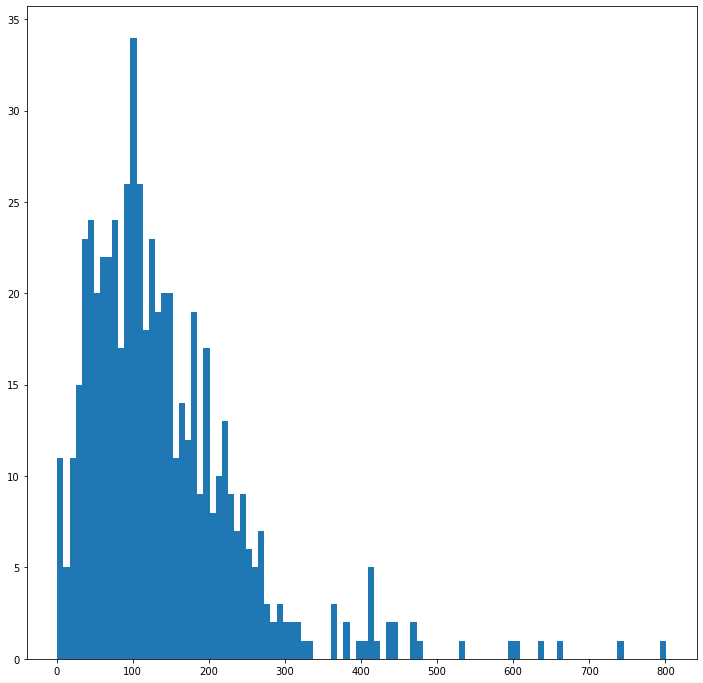

In [25]:
plt.figure(figsize=(12,12))
p = plt.hist(week['time'],bins=100)

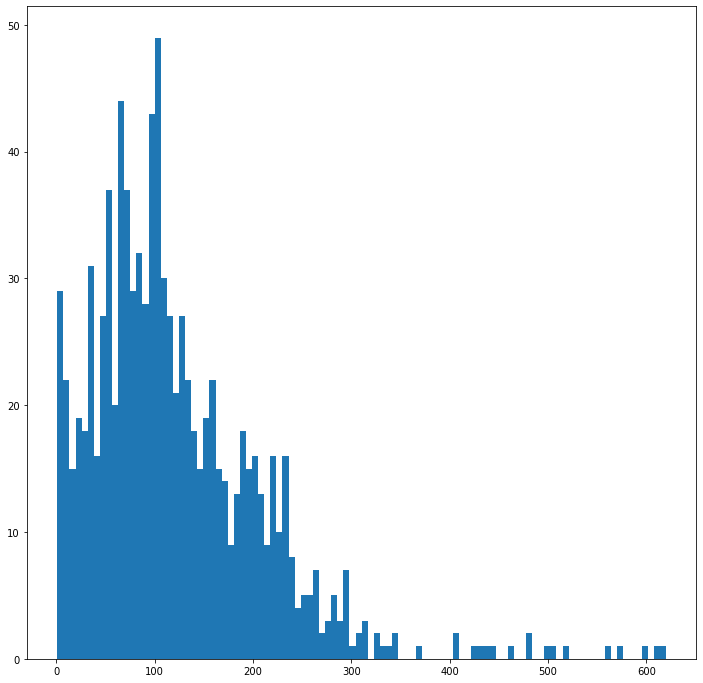

In [26]:
plt.figure(figsize=(12,12))
p = plt.hist(hol['time'],bins=100)

In [27]:
from scipy.stats import kruskal

print(kruskal(week['time'],hol['time']))

KruskalResult(statistic=10.656765874528409, pvalue=0.0010966898770451454)


피밸류 작아서 따로 나눠야함

### 시간대 별로 체크

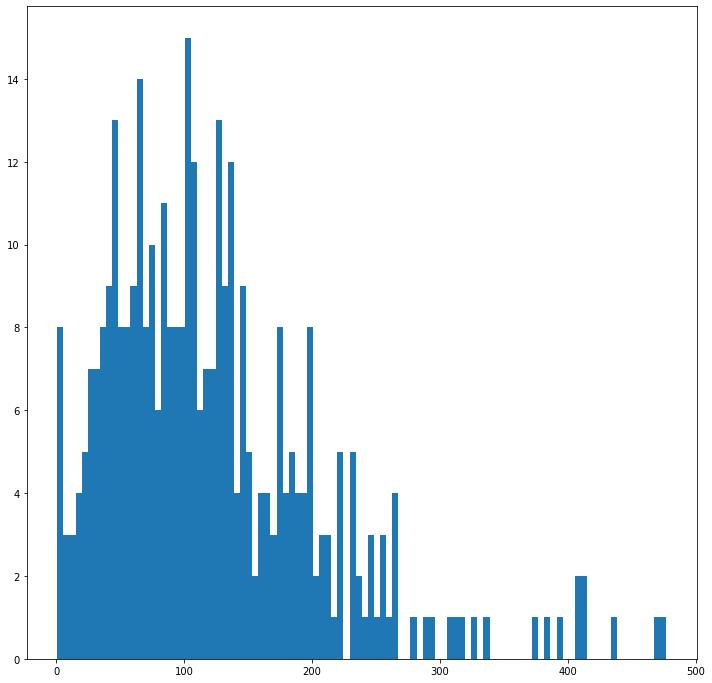

In [28]:
plt.figure(figsize=(12,12))
p = plt.hist(week1['time'],bins=100)

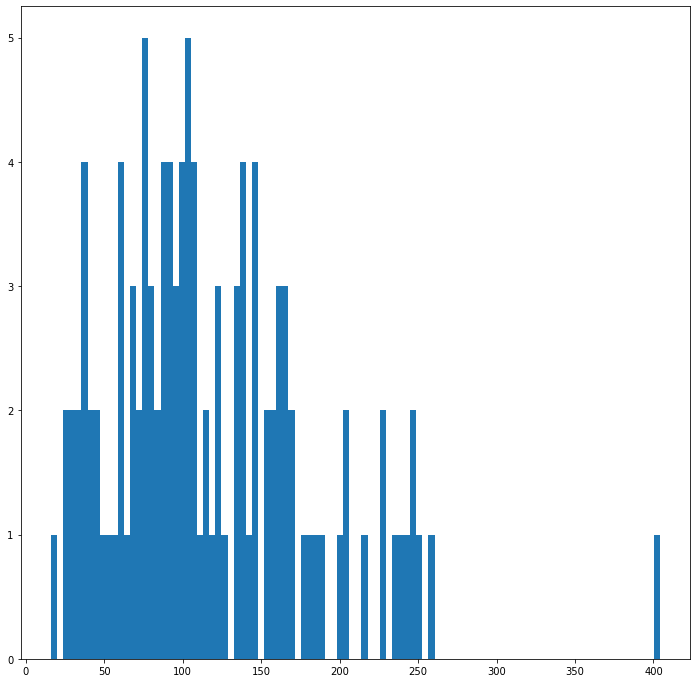

In [29]:
plt.figure(figsize=(12,12))
p = plt.hist(week2['time'],bins=100)

In [30]:
print(kruskal(week1['time'],week2['time']))

KruskalResult(statistic=0.03879014036402048, pvalue=0.8438650009674329)


피밸류 커서 합쳐도됨

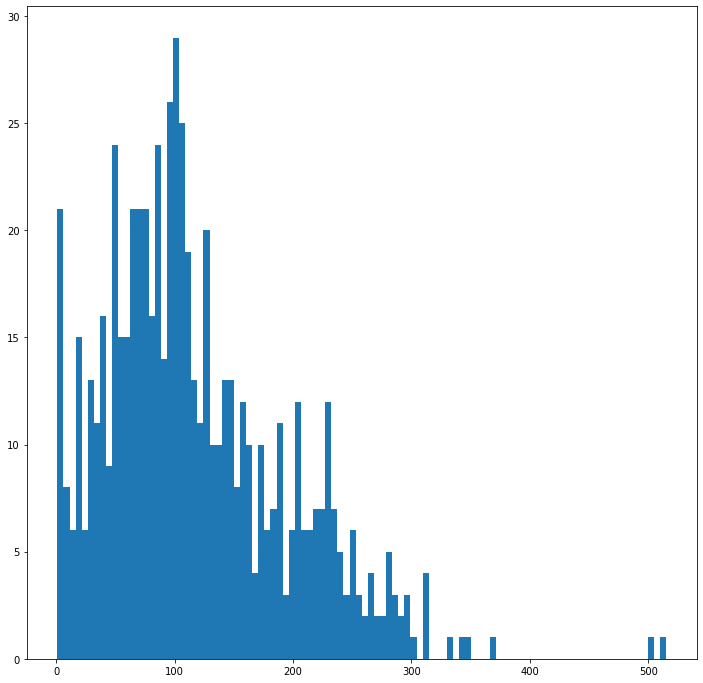

In [31]:
plt.figure(figsize=(12,12))
p = plt.hist(hol1['time'],bins=100)

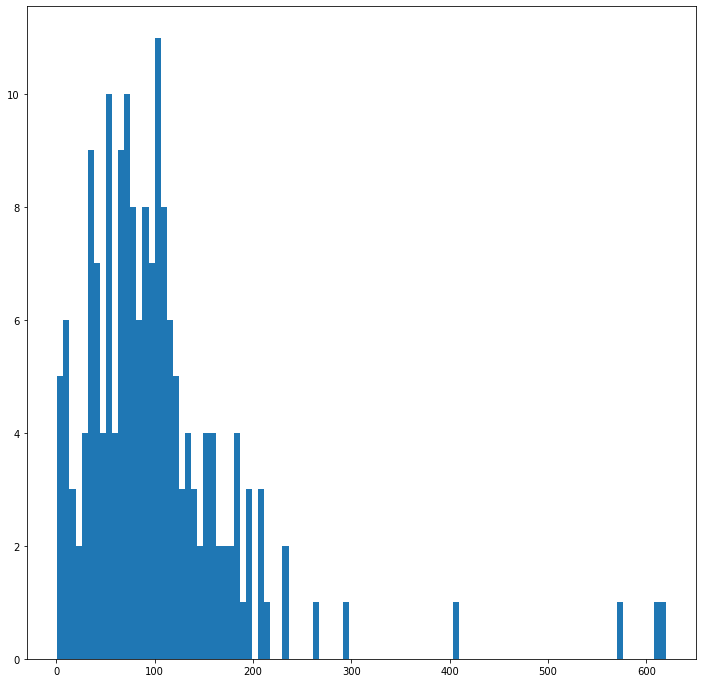

In [32]:
plt.figure(figsize=(12,12))
p = plt.hist(hol2['time'],bins=100)

In [34]:
print(kruskal(hol1['time'],hol2['time']))

KruskalResult(statistic=8.532192845575553, pvalue=0.0034891905888322435)


피밸류 작음

### 1,2,3월 체크

In [ ]:
from datetime import datetime

#1월 (충전종료일자으로 분류)
df["충전종료일자"]=pd.to_datetime(df["충전종료일자"]) 
df_jan = df.loc[(df["충전종료일자"]>= datetime(2022,1,1)) & (df["충전종료일자"] < datetime(2022,2,1)),:]
df_feb = df.loc[(df["충전종료일자"]>= datetime(2022,2,1)) & (df["충전종료일자"] < datetime(2022,3,1)),:]
df_mar = df.loc[(df["충전종료일자"]>= datetime(2022,3,1)) & (df["충전종료일자"] < datetime(2022,4,1)),:]

In [ ]:
df_jan.shape, df_feb.shape, df_mar.shape

((783, 10), (639, 10), (538, 10))

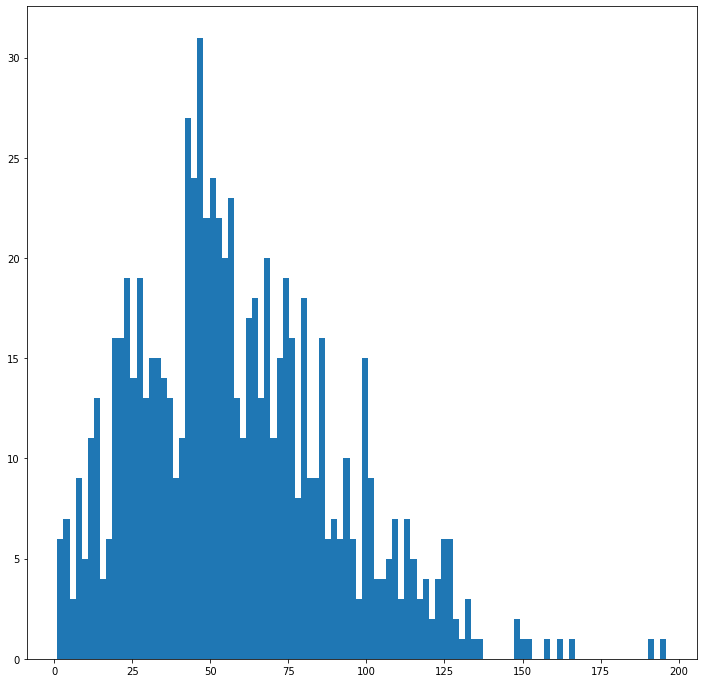

In [ ]:
#1월 Service time 분포 > 정규분포 X
plt.figure(figsize=(12,12))
p = plt.hist(df_jan['time'],bins=100)

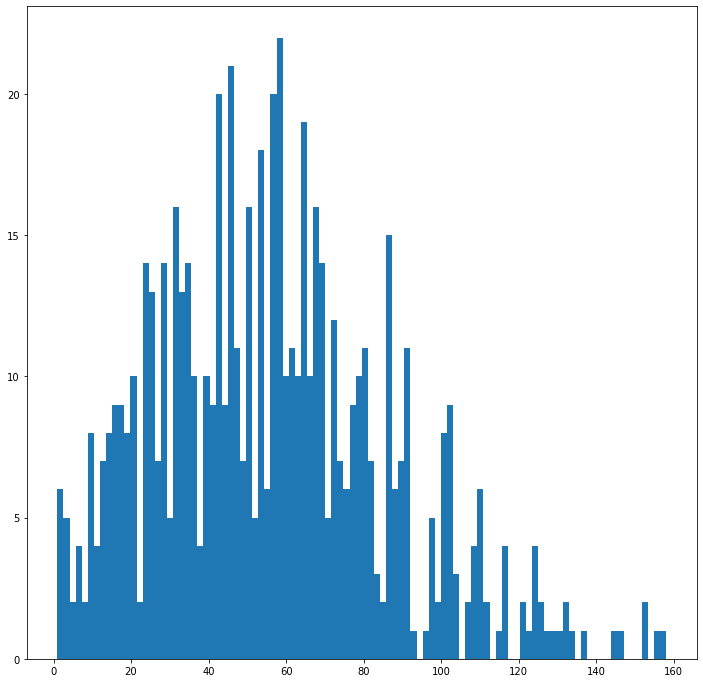

In [ ]:
#2월 Service time 분포 > 정규분포 X
plt.figure(figsize=(12,12))
p = plt.hist(df_feb['time'],bins=100)

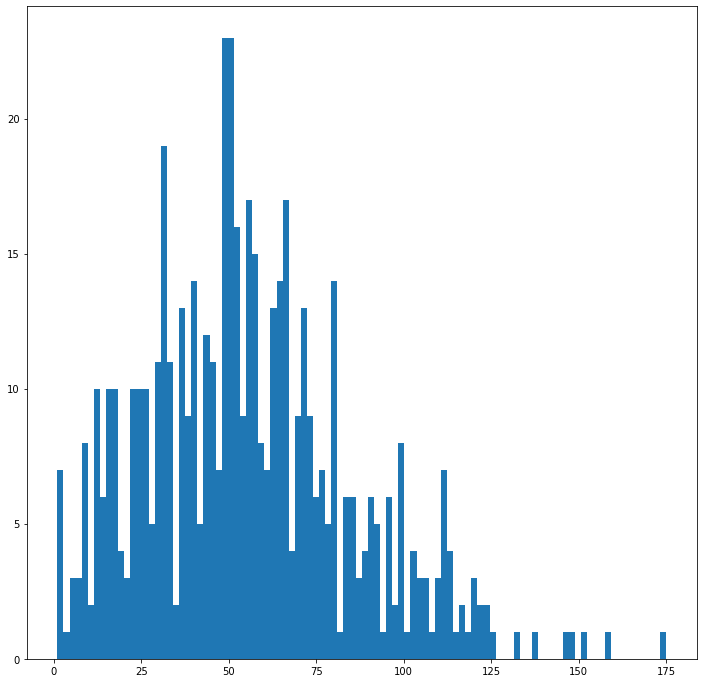

In [ ]:
#3월 Service time 분포 > 정규분포 X
plt.figure(figsize=(12,12))
p = plt.hist(df_mar['time'],bins=100)

3개월 데이타 모두 정규분포가 아니므로, 비모수 검정인  kruskal-wallis test 사용

In [ ]:
from scipy.stats import kruskal

In [ ]:
service_jan, service_feb, service_mar = df_jan['time'], df_feb['time'], df_mar['time']

In [ ]:
print(kruskal(service_jan, service_feb, service_mar))

KruskalResult(statistic=2.4405305241085715, pvalue=0.2951518639493119)


P-value가 0.786으로 유의수준 0.05에 비해 월등히 크므로 귀무가설을 기각할 수 없다. >> Fail to reject H0 <br>
즉 1월, 2월, 3월달의 service time 분포가 모두 동일하다고 가정하고 세개의 데이터를 합산해서 service time의 분포를 추정할 수 있다.

## Step 2. Independence Check

시뮬레이션의 input data는 동일한 분포로 가정할 수 있는 서로 독립인 데이터일 때 이후의 통계적 분석이
가능하다. <br>
독립성을 확인하기 위하여 Heuristic procedure의 일환으로 1) Scatter-plot, 2) Correlation-plot을 이용한다. 

## Scatter diagram : Plot pairs (Xi, Xi+1)

In [ ]:
#1535 pair, 인덱스 통일해주어야 함
service_time = df["time"][:-1].reset_index(drop=True) 
service_time_2 = df["time"][1:].reset_index(drop=True)

In [ ]:
service_time.shape, service_time_2.shape

((1535,), (1535,))

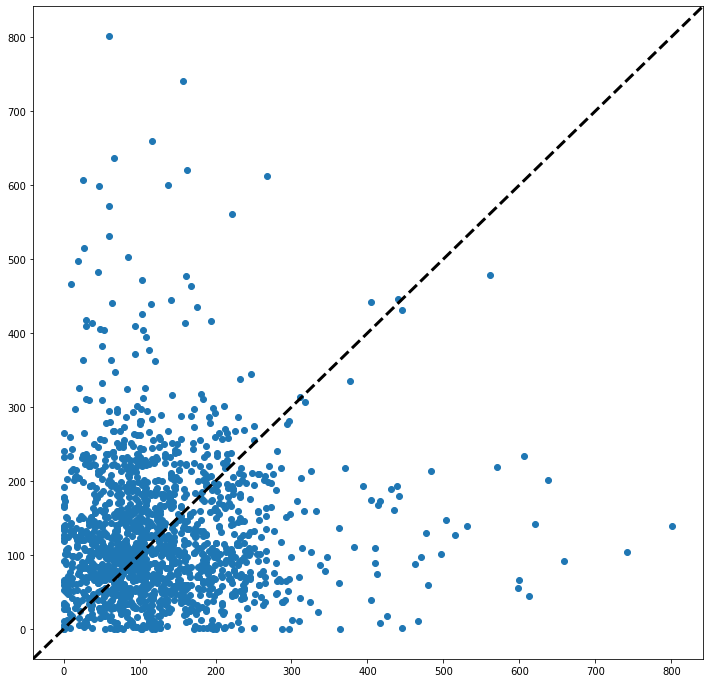

In [ ]:
fig, ax = plt.subplots(1,1, figsize= (12,12))
ax.scatter(service_time,service_time_2)
xpoints = ypoints = ax.get_xlim()
ax.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

pair들이 random하게 퍼져있는 것을 보아, data가 independent하다는 것을 알 수 있다

## Correlation Plot

In [ ]:
service_time_mean = df["time"].mean()
service_time_deviation = np.var(df["time"])

In [ ]:
service_time_mean, service_time_deviation

(127.6328125, 9337.958923339844)

In [ ]:
service_time_df = pd.concat([service_time,service_time_2],axis=1)

In [ ]:
service_time_df.corr()

,time,time
time,1.000000,0.034358
time,0.034358,1.000000


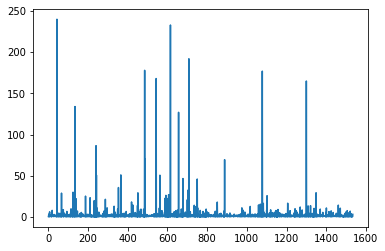

In [ ]:
correlation.plot()

Fitting 4 distributions: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,0.000025,1718.356863,-27511.660659,inf,0.038473,2.064040e-02
beta,0.000027,1862.272306,-27387.524237,inf,0.029351,1.389878e-01
gamma,0.000027,1759.795810,-27382.630866,inf,0.032425,7.740861e-02
norm,0.000066,2471.842084,-26035.490692,inf,0.105255,2.853993e-15


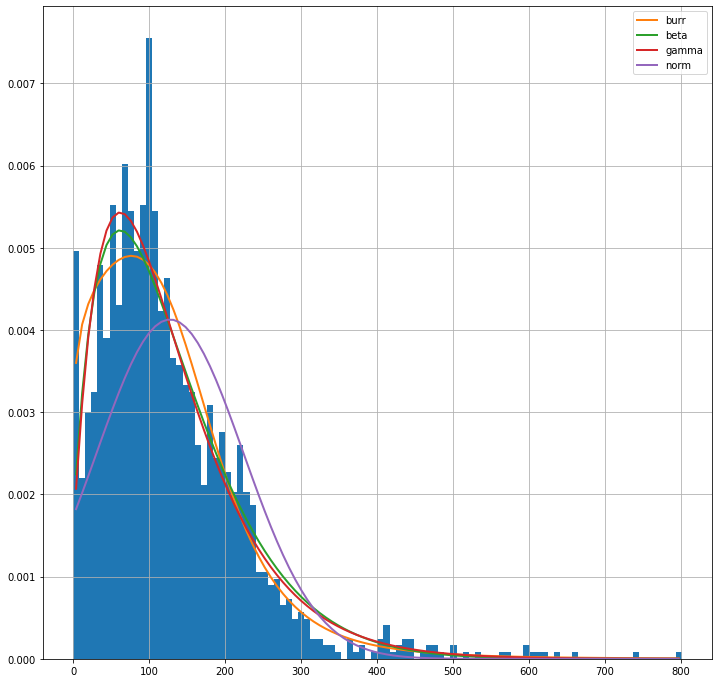

In [ ]:
f = Fitter(slow_time,
           distributions=['gamma',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
plt.figure(figsize=(12,12))
f.summary()

In [ ]:
df["충전종료일자"]

0        2022.1.1
1        2022.1.1
2        2022.1.1
3        2022.1.1
4        2022.1.1
          ...    
3516    2022.3.30
3517    2022.3.30
3518    2022.3.30
3519    2022.3.30
3520    2022.3.30
Name: 충전종료일자, Length: 3521, dtype: object